 Data viz as/for advocacy (slide 08), Beyond matplotlib (slide 09)

Data viz as/for advocacy - Notes

Beyond matplotlib

In [ ]:
# Install packages and load librairies

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests

Seaborn is a data viz package built on top of matplotlib
Advantage: semantic mapping capability (helps match dataset characteristics to plot elements)

In [ ]:
# Load the ‘tips’ sample dataset, which is available as part of the seaborn (sns) package using the load_dataset() function

tips = sns.load_dataset("tips")
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


<Axes: xlabel='total_bill', ylabel='tip'>

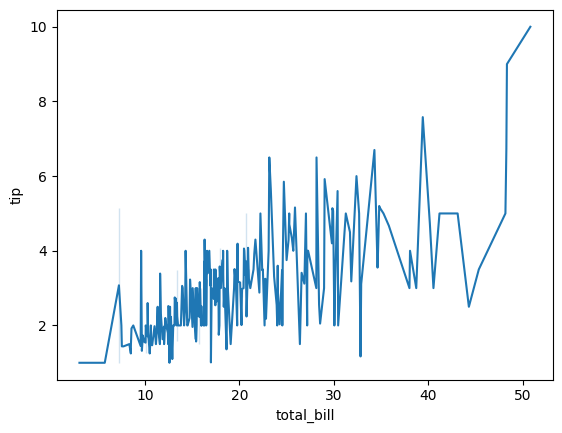

In [3]:
# Generate a simple line plot of tip amount vs total bill using the seaborn lineplot() function

sns.lineplot(data=tips, # choose our dataset from the sns data package
    x='total_bill', # define our x variable
    y='tip') # define our y variable

Note: the most frequent tip amount == dark blue line; actual tip amount range == light blue line

<Axes: xlabel='total_bill', ylabel='tip'>

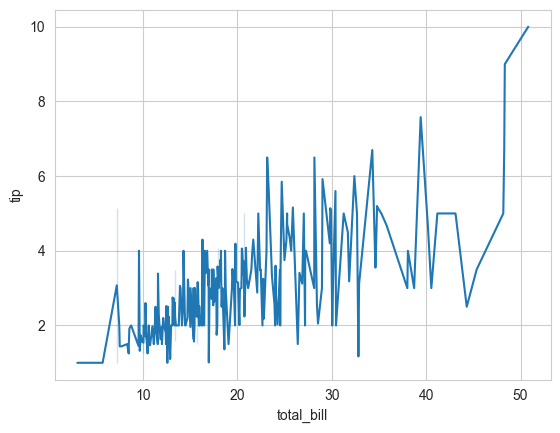

In [5]:
# Use premade styles to alter the appearance of the plot

sns.set_style('whitegrid')
sns.lineplot(data=tips, # choose our dataset from the sns data package
    x='total_bill', # define our x variable
    y='tip') # define our y variable

In [ ]:
# Try other preset styles like ‘darkgrid’, ‘whitegrid’, ‘dark’, ‘white’, ‘ticks’, then make the line plot again – how has it changed?


<Axes: xlabel='total_bill', ylabel='tip'>

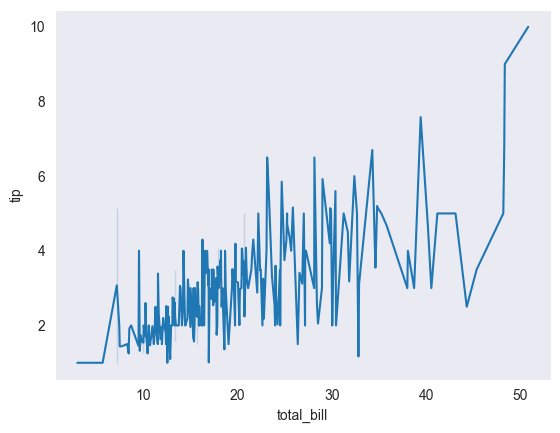

In [ ]:
# use dark preset style
sns.set_style('dark')
sns.lineplot(data=tips, # choose our dataset from the sns data package
    x='total_bill', # define our x variable
    y='tip') # define our y variable

[Text(0.5, 1.0, 'Tips vs. Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

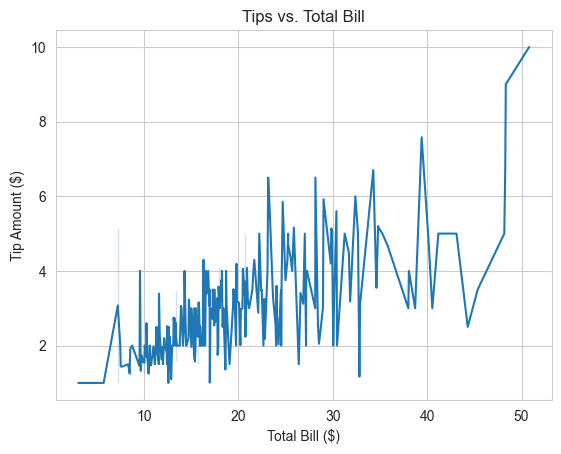

In [ ]:
# Use the .set() function to add tipgraph title and axis labels

sns.set_style('whitegrid')
tipgraph=sns.lineplot(data=tips, x='total_bill', y='tip') # name the tipgraph
tipgraph.set(title='Tips vs. Total Bill',
    xlabel='Total Bill ($)',
    ylabel='Tip Amount ($)')

Modify aesthetic elements

[Text(0.5, 1.0, 'Tips vs. Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

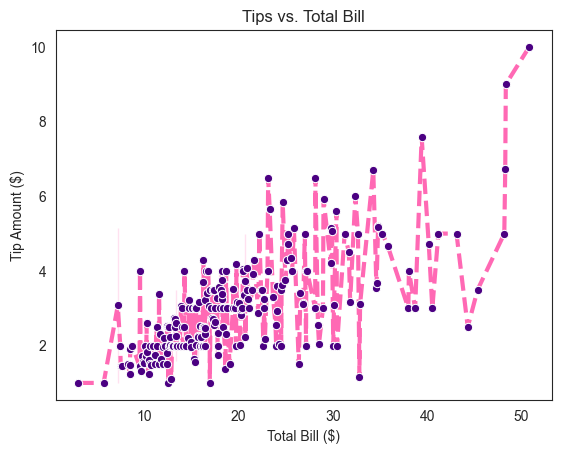

In [12]:
# Change colour, marker style, and line style
sns.set_style('white')
tipgraph = sns.lineplot(data=tips,
    x='total_bill',
    y='tip',
    color = 'hotpink',
    linestyle = '--',
    linewidth = 3,
    marker = 'o',
    markerfacecolor = 'indigo')

tipgraph.set(title='Tips vs. Total Bill',
    xlabel='Total Bill ($)',
    ylabel='Tip Amount ($)')

Add multiple variables

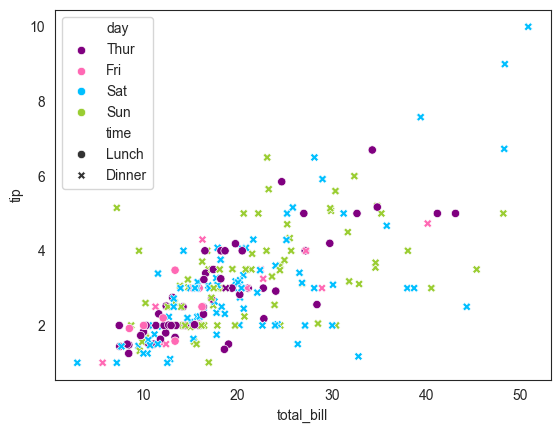

In [ ]:
# Represent multiple variables with different visual elements of the graph
# NOTE: I could note use single parenthesis exclusively

tipgraph = sns.scatterplot(data=tips, x='total_bill',
                            y="tip", 
                            style = 'time', # identfy data points by customer meal time using marker type
                            hue ="day", # identify data points by customer day using marker colour
                            palette = ["purple","hotpink", "deepskyblue", "yellowgreen"]) # change marker colours

[Text(0.5, 1.0, 'Tips vs. Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

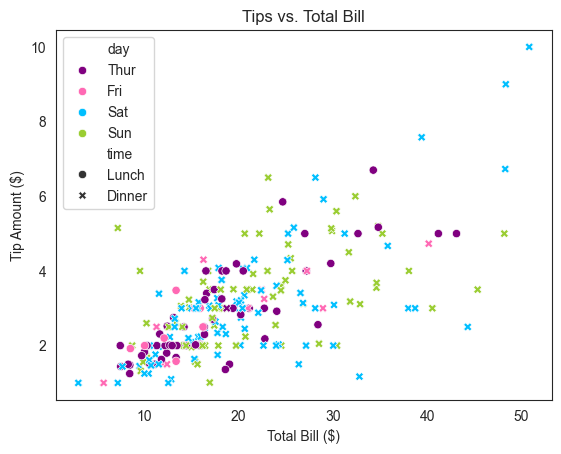

In [ ]:
# Use the set function to add graph title and axis labels

tipgraph = sns.scatterplot(data=tips, x='total_bill',
                            y="tip", 
                            style = 'time', # identfy data points by customer meal time using marker type
                            hue ="day", # identify data points by customer day using marker colour
                            palette = ["purple","hotpink", "deepskyblue", "yellowgreen"]) # change marker colours

tipgraph.set(title='Tips vs. Total Bill',
    xlabel='Total Bill ($)',
    ylabel='Tip Amount ($)')

Pairplot - use to compare variables

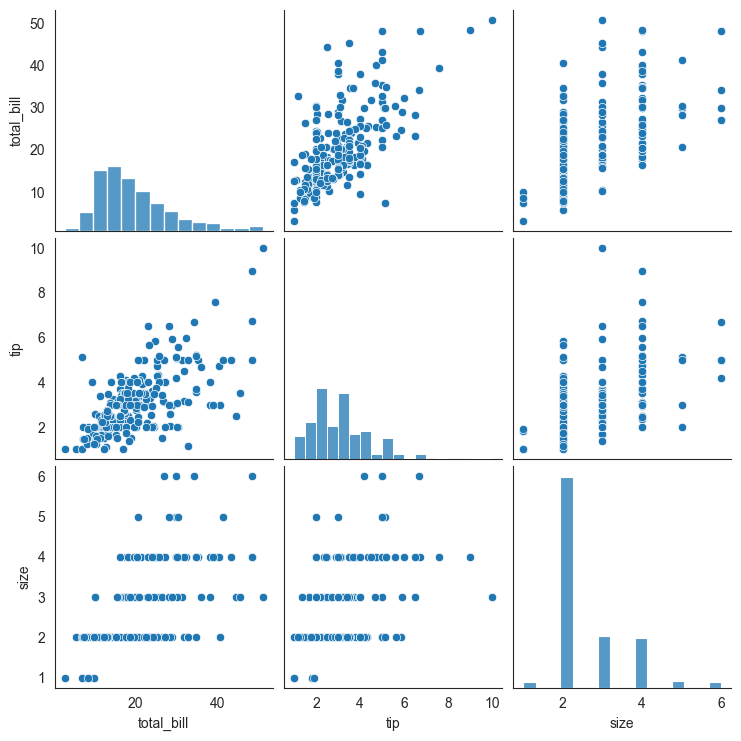

In [ ]:
# Use the pairplot function to plot all combinations for the dataset quantitative variables
# Particularly helpful for exploratory analysis

sns.pairplot(data = tips)

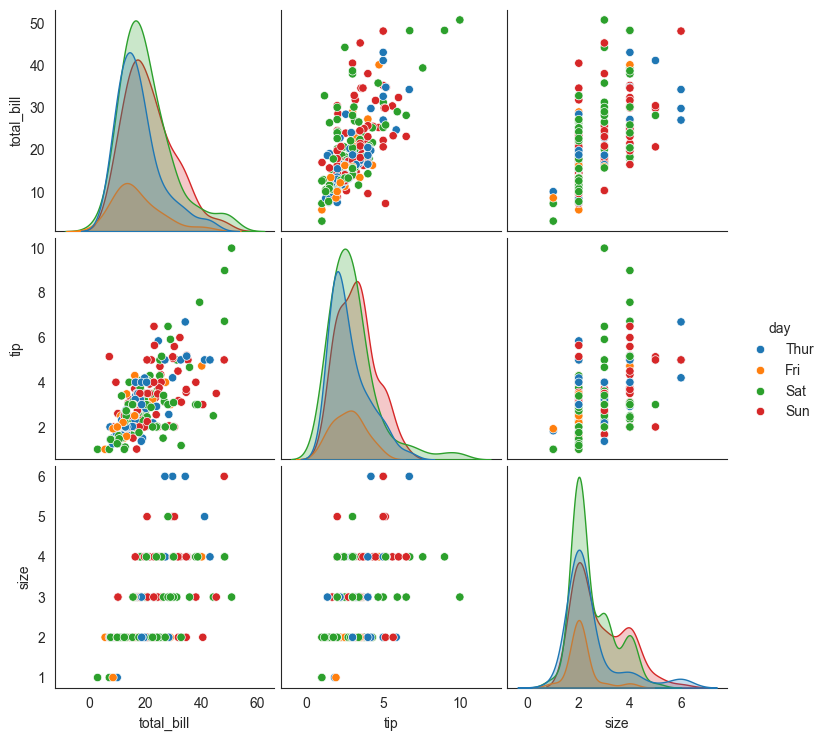

In [ ]:
# Add hue arguemnt to plot the variables for different days.
# Note: changes histogram to a density plot

sns.pairplot(
    data = tips,
    hue = 'day')

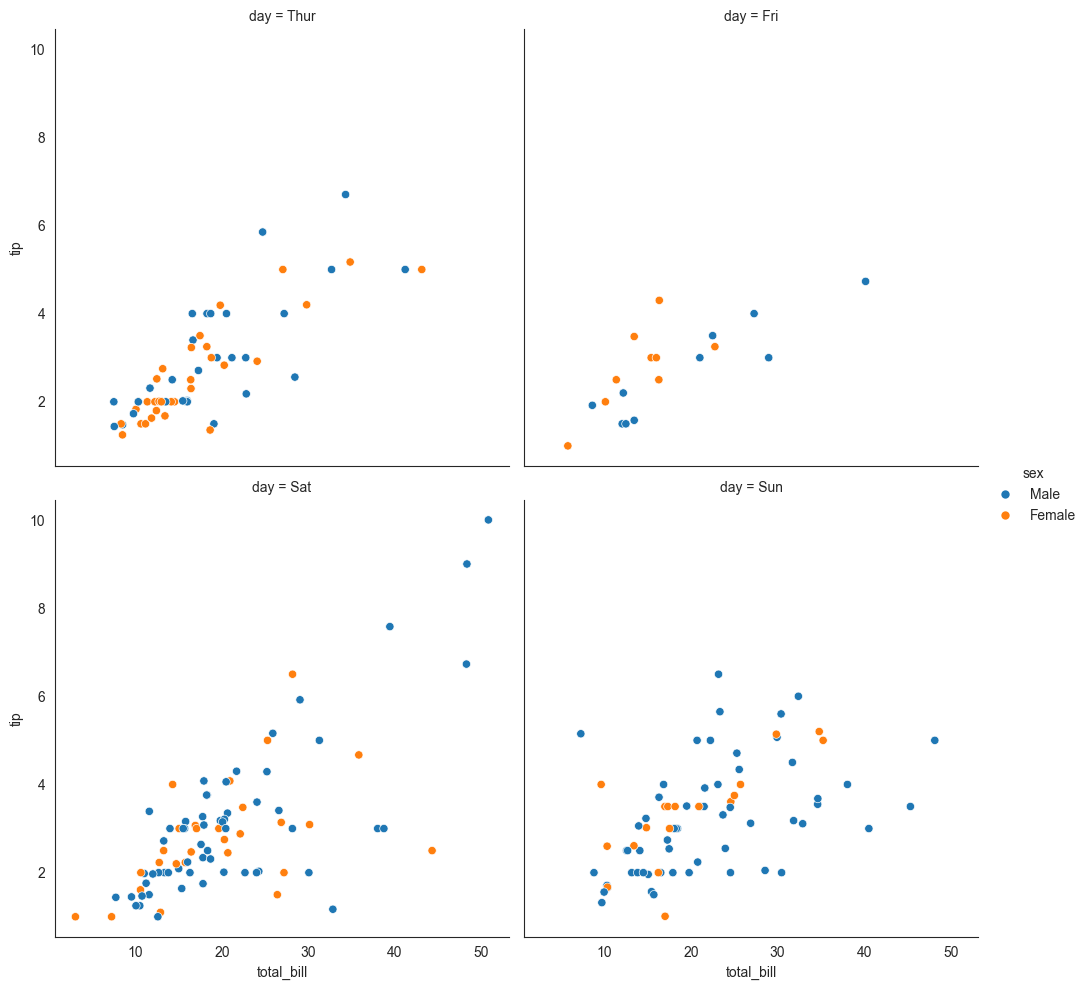

In [ ]:
# Use the relplot function to explore speciific levels within variables
# Add comments to describe what each new code element is doing

daysplot = sns.relplot(data=tips,
                        x="total_bill",
                        y="tip",
                        hue="sex", # stratify datapoints by sex 
                        col="day", # divide the dataset into plots by day
                        kind="scatter", # define the plot type
                        col_wrap=2) # wrap the columns into two plots by row

Seaborn resources: 
1. https://images.datacamp.com/image/upload/v1676302629/Marketing/Blog/Seaborn_Cheat_Sheet.pdf
2. http://seaborn.pydata.org/examples/index.html

Plotly

In [29]:
# Import package 
import plotly.graph_objects as go # 'go' is 'graph objects’

# Make some sample data
x1 = np.array(["Luffy", "Zoro", "Nami", "Usopp", "Sanji"])
y1 = np.array([110, 180, 240, 99, 220])

In [ ]:
# Generate a plot using the figure() and the add_trace(go.Bar) functions
# NOTE: interactive graph - creates data labels for the datapoints + buttons to interact with other graphing features

# 1. Make a figure object and name it "graph"
graph = go.Figure()
# 2. Choose the plot type (bar) and data
graph.add_trace(go.Bar(x=x1, y=y1))

In [31]:
# Update the layout to include titles

graph.update_layout(
    title="Pirate Scores",
    xaxis_title="Pirates",
    yaxis_title="Score")
graph.show() # Show the plot

In [34]:
# Export plotly graphs: save as HTML files and embed in a webpage
graph.write_html("C:/Users/CECi/Desktop/DSI/visualization/02_activities/assignments/participation/pirategraph.html")

In [ ]:
# Customize plotly graphs: dict function is used for the plotly package to customize the marker(s)

graph = go.Figure() # Create the figure object

graph.add_trace(go.Scatter(x=x1, y=y1, mode='markers', # we want points for a scatter plot
        marker=dict(size=15, # point size
                    color="hotpink", # point colour
                    opacity=1, # point transparency (here, non)
                    line=dict(width=5, color="purple")))) #point outline

In [ ]:
# Plotly graph layout - improve width readability and add a title
graph.update_layout(
    title='Interactive Pirate Plot',
    xaxis_title='Pirates',
    yaxis_title='Scores',
    width=500, height=500)

In [54]:
# Wordclouds

# Import wordcloud package
from wordcloud import WordCloud
# Load the sample dataset
df = pd.read_csv("https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/movie_quotes.csv",
on_bad_lines='skip')
df

,quote,movie,type,year
0,"Do, or do not. There is no try.",Star Wars: Episode V - The Empire Strikes Back,movie,1890
1,Listen to them. Children of the night. What mu...,Dracula,movie,1931
2,It's alive! It's alive!,Frankenstein,movie,1931
3,"Oh, no, it wasn't the airplanes. It was Beauty...",King Kong,movie,1933
4,"Magic Mirror on the wall, who is the fairest o...",Snow White and the Seven Dwarves,movie,1937
...,...,...,...,...
727,I didn't know if you were lost. Stick with me....,Us,movie,2019
728,This guy's awesome! He's holding his own while...,Dragon Ball Super: Broly,movie,2019
729,"Murder is murder, it don’t matter who you are.",Black and Blue,movie,2019
730,You know what a lion is? A lion is a strong an...,Between Two Ferns: The Movie,movie,2019


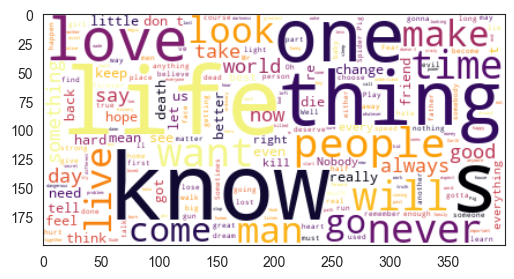

In [ ]:
# Make a simple wordcloud with the movie 'quote' variable - Do this in three steps

# join all our text from each row from our quote column into a string
text = " ".join(each for each in df.quote)

# generate our wordcloud image using the WordCloud() and the generate() functions
wordcloud = WordCloud(background_color="white",
colormap = 'inferno').generate(text) # counts word frequencies and sets the word frequency colours

# use matplotlib syntax to put our image in a figure
fig, ax = plt.subplots(figsize=(7, 3))
ax.imshow(wordcloud, # remember 'imshow' from when we added pictures to our matplotlib axes
interpolation='bilinear') # this line helps smooth our image
ax.axis("off") # removes the figure marking edge and axis tick marks

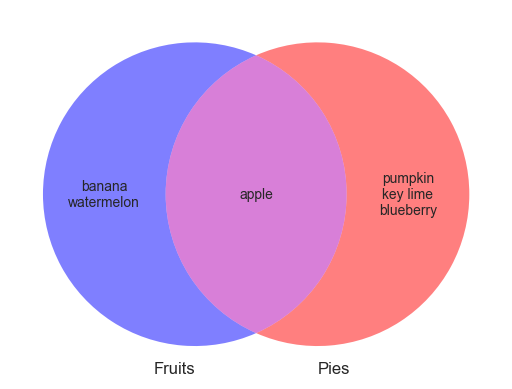

In [ ]:
# Making venn diagrams using the matplotlib_venn extension

# Import package
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted

# Define the venn  variable sets
A = set(["apple", "banana", "watermelon"])
B = set(["pumpkin", "blueberry", "apple", "key lime"])

# Diagram the sets by assigning the sets to their reppective circles & modify the diagram appearance
diagram = venn2_unweighted([A, B],
                            set_labels = ('Fruits', 'Pies'), # define the sets
                            set_colors=("blue", "red"),
                            alpha=0.5)
# plt.show()

# Label the venn diagram sets
# Note: use of "\" to list the variables by line
diagram.get_label_by_id("10").set_text("\n".join(A - B))

diagram.get_label_by_id("11").set_text("\n".join(A & B))

diagram.get_label_by_id("01").set_text("\n".join(B - A))